# Detect Glaucoma from retinal Fundus images using CNN by Uttam Basu

# Importing packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

%matplotlib inline

# Data Loading

In [2]:
zip_dir = 'GlaucomaDetectionSmall.zip'

In [3]:
zip_dir

'GlaucomaDetectionSmall.zip'

In [4]:
zip_dir_base = os.path.dirname(zip_dir)

# Assign variables with the proper file path for the training and test sets

In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'GlaucomaDetectionSmall')
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')

# directory with our training cat pictures
train_glaucoma_dir = os.path.join(train_dir, 'glaucoma')  
# directory with our training dog pictures
train_nonglaucoma_dir = os.path.join(train_dir, 'nonglaucoma')  

# directory with our validation cat pictures
validation_glaucoma_dir = os.path.join(validation_dir, 'glaucoma') 
 # directory with our validation dog pictures
validation_nonglaucoma_dir = os.path.join(validation_dir, 'nonglaucoma') 


# Understanding the data

In [6]:
num_glaucoma_tr = len(os.listdir(train_glaucoma_dir))
num_nonglaucoma_tr = len(os.listdir(train_nonglaucoma_dir))

num_glaucoma_val = len(os.listdir(validation_glaucoma_dir))
num_nonglaucoma_val = len(os.listdir(validation_nonglaucoma_dir))

total_train = num_glaucoma_tr + num_nonglaucoma_tr
total_val = num_glaucoma_val + num_nonglaucoma_val

In [7]:
print('Total training glaucoma images:', num_glaucoma_tr)
print('Total training nonglaucoma images:', num_nonglaucoma_tr)

print('Total validation glaucoma images:', num_glaucoma_val)
print('Total validation nonglaucoma images:', num_nonglaucoma_val)
print("--------------------------------")
print("Total training images:", total_train)
print("Total test images:", total_val)

Total training glaucoma images: 99
Total training nonglaucoma images: 100
Total validation glaucoma images: 39
Total validation nonglaucoma images: 40
--------------------------------
Total training images: 199
Total test images: 79


# Set Model Parameters

In [8]:
# Number of training examples to process before updating our models variables
BATCH_SIZE = 10  
IMG_SHAPE  = 100

# Data Preparation

In [9]:
# Generator for our training data
train_image_generator = ImageDataGenerator(rescale=1./255)  
# Generator for our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

Found 199 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 79 images belonging to 2 classes.


# Visualizing Training images

In [12]:
sample_training_images,_ = next(train_data_gen)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(40,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

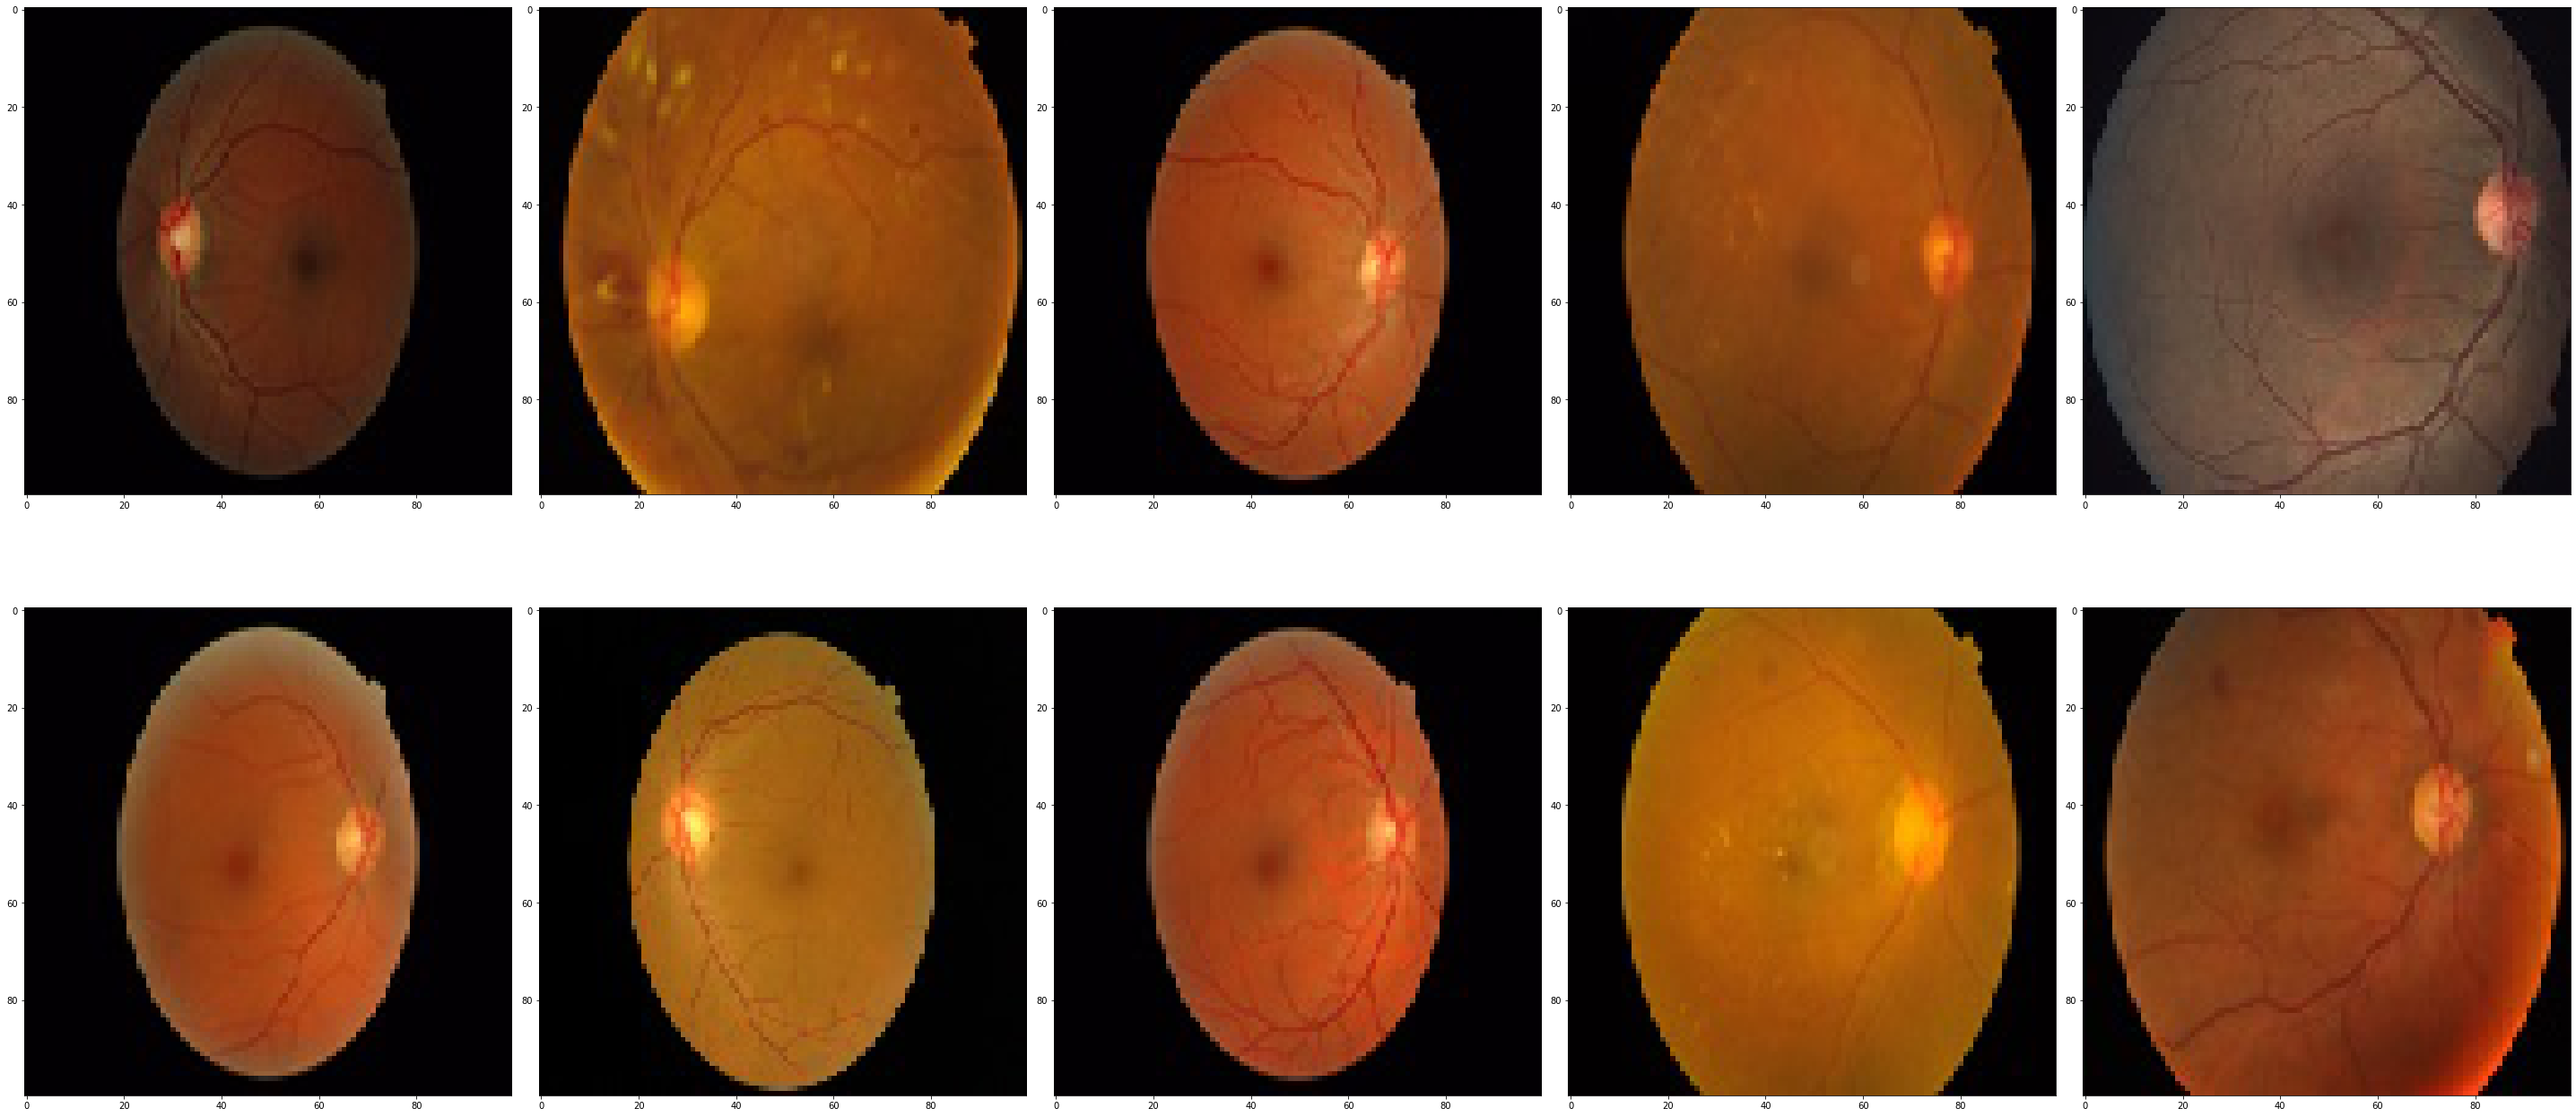

In [14]:
# Plot images 1-10
plotImages(sample_training_images[0:10])  

# Define the model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Compile the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

# Train the model

In [18]:
EPOCHS = 20
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/20
20/20 [==============================] - 5s 246ms/step - loss: 0.3756 - acc: 0.8442 - val_loss: 0.4119 - val_acc: 0.9494
Epoch 2/20
20/20 [==============================] - 4s 199ms/step - loss: 0.1350 - acc: 0.9497 - val_loss: 0.1961 - val_acc: 0.9620
Epoch 3/20
20/20 [==============================] - 4s 209ms/step - loss: 0.0252 - acc: 0.9950 - val_loss: 0.1347 - val_acc: 0.9873
Epoch 4/20
20/20 [==============================] - 4s 205ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2009 - val_acc: 0.9873
Epoch 5/20
20/20 [==============================] - 4s 211ms/step - loss: 6.3866e-04 - acc: 1.0000 - val_loss: 0.1922 - val_acc: 0.9873
Epoch 6/20
20/20 [==============================] - 4s 192ms/step - loss: 3.2578e-04 - acc: 1.0000 - val_loss: 0.2096 - val_acc: 0.9873
Epoch 7/20
20/20 [==============================] - 4s 194ms/step - loss: 2.2631e-04 - acc: 1.0000 - val_loss: 0.2256 - val_acc: 0.9873
Epoch 8/20
20/20 [==============================] - 4s 197ms/ste

# Visualizing Results 

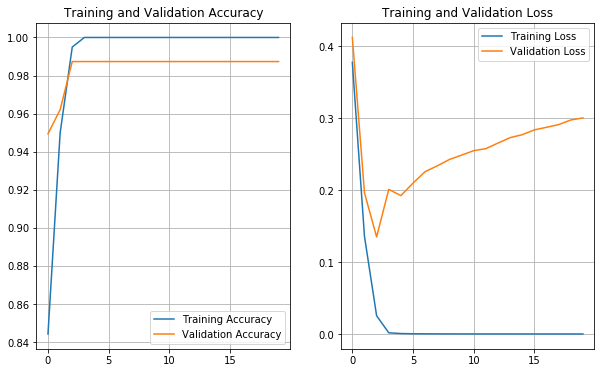

<Figure size 432x288 with 0 Axes>

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()
plt.savefig('./Result.png')


# Thank You